In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def read_data(file_path):
    data = pd.read_csv(file_path)
    return data

data = read_data('./ai4i2020.csv')
print(data.iloc[:5, :]) 
print(data.shape)

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [3]:
data.dtypes.value_counts()

int64      9
float64    3
object     2
Name: count, dtype: int64

In [4]:
# 前两列是编号，中间6列是特征，最后5列是目标
data = data.iloc[:, 2:]
print(data.iloc[:5, :]) 

  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0         42.8                0                0    0    0    0    0    0  
1         46.3                3                0    0    0    0    0    0  
2         49.4                5                0    0    0    0    0    0  
3         39.5                7                0    0    0    0    0    0  
4         40.0                9                0    0    0    0    0    0  


In [5]:
class pt_feature():
    def __init__(self, data, axes_shape=(3, 2)):
        self.data = data
        self.i = 0
        self.j = 0
        self.axes_shape = axes_shape

    def plot_feature(self, axes, feature_name):
        i = self.i
        j = self.j
        x = self.data[feature_name].to_numpy()
        y_jitter = np.random.normal(0, 0.05, len(x))
        axes[i,j].scatter(x, y_jitter, alpha=0.5, s=30, c=x, cmap='coolwarm', edgecolors='black', linewidth=0.3, zorder=3)
        axes[i,j].axhline(y=0, color='red', linestyle='-', alpha=0.7, linewidth=1, zorder=2)
        axes[i,j].grid(True, alpha=0.3, zorder=1)
        axes[i,j].set_yticks([])
        axes[i,j].set_title(feature_name)
        axes[i,j].figure.tight_layout()
        if self.j == self.axes_shape[1] - 1:
            self.j = 0
            self.i += 1
        else:
            self.j += 1
        

In [6]:
data.dtypes[1:5].index

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]'],
      dtype='object')

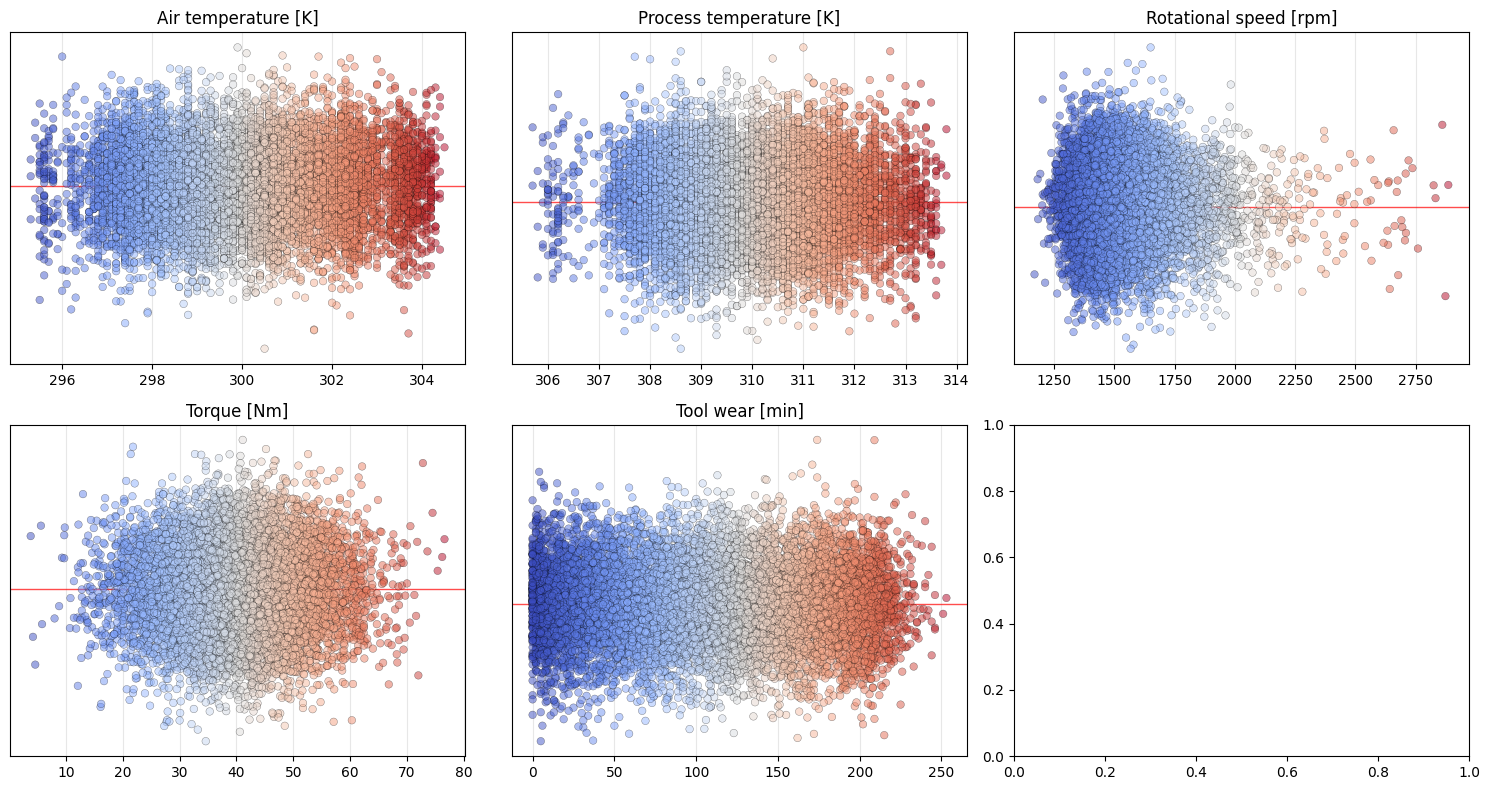

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8)) 
pt = pt_feature(data, axes_shape=axes.shape)
for col in data[data.dtypes[1:6].index]:
    name = col
    pt.plot_feature(axes, name)

In [8]:
def numeric(x):
    return (x - x.mean()) / (x.std())

def uniform(x):
    return (x - x.min()) / (x.max() - x.min())

data[data.dtypes[1:5].index] = numeric(data[data.dtypes[1:5].index])
data["Tool wear [min]"] = uniform(data["Tool wear [min]"])
data.head()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,-0.952342,-0.947313,0.068182,0.282186,0.000000,0,0,0,0,0,0
1,L,-0.902348,-0.879915,-0.729435,0.633276,0.011858,0,0,0,0,0,0
2,L,-0.952342,-1.014710,-0.227438,0.944242,0.019763,0,0,0,0,0,0
3,L,-0.902348,-0.947313,-0.589992,-0.048843,0.027668,0,0,0,0,0,0
4,L,-0.902348,-0.879915,-0.729435,0.001313,0.035573,0,0,0,0,0,0


In [9]:
data = pd.get_dummies(data)
data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,-0.952342,-0.947313,0.068182,0.282186,0.000000,0,0,0,0,0,0,False,False,True
1,-0.902348,-0.879915,-0.729435,0.633276,0.011858,0,0,0,0,0,0,False,True,False
2,-0.952342,-1.014710,-0.227438,0.944242,0.019763,0,0,0,0,0,0,False,True,False
3,-0.902348,-0.947313,-0.589992,-0.048843,0.027668,0,0,0,0,0,0,False,True,False
4,-0.902348,-0.879915,-0.729435,0.001313,0.035573,0,0,0,0,0,0,False,True,False


In [10]:
features = data.drop(columns=['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
#labels = data[["TWF", 'HDF', 'PWF', 'OSF', 'RNF']]
labels = data['Machine failure']

features = features.astype(np.float64)
labels = labels.astype(np.float64)  

print(features.head())
print(labels.head())

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0            -0.952342                -0.947313                0.068182   
1            -0.902348                -0.879915               -0.729435   
2            -0.952342                -1.014710               -0.227438   
3            -0.902348                -0.947313               -0.589992   
4            -0.902348                -0.879915               -0.729435   

   Torque [Nm]  Tool wear [min]  Type_H  Type_L  Type_M  
0     0.282186         0.000000     0.0     0.0     1.0  
1     0.633276         0.011858     0.0     1.0     0.0  
2     0.944242         0.019763     0.0     1.0     0.0  
3    -0.048843         0.027668     0.0     1.0     0.0  
4     0.001313         0.035573     0.0     1.0     0.0  
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Machine failure, dtype: float64


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state= 42)

model = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced'
)

model.fit(train_features, train_labels)

y_pred = model.predict(test_features)
y_prob = model.predict_proba(test_features)[:, 1]

with open('out.txt', 'wb') as f:
    print("Accuracy:", accuracy_score(test_labels, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(test_labels, y_pred))
    print("Report:\n", classification_report(test_labels, y_pred))
    
    f.write(b"Accuracy: " + str(accuracy_score(test_labels, y_pred)).encode() + b"\n")
    f.write(b"Confusion Matrix:\n" + str(confusion_matrix(test_labels, y_pred)).encode() + b"\n")
    f.write(b"Report:\n" + str(classification_report(test_labels, y_pred)).encode() + b"\n")

Accuracy: 0.8266666666666667
Confusion Matrix:
 [[2404  503]
 [  17   76]]
Report:
               precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      2907
         1.0       0.13      0.82      0.23        93

    accuracy                           0.83      3000
   macro avg       0.56      0.82      0.56      3000
weighted avg       0.97      0.83      0.88      3000



d:\File\Py\Predict\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [25]:
print(model.coef_)      # 权重 w
print(model.intercept_) # 偏置 b

[[ 2.02826651 -1.42405914  1.76308972  2.45444166  3.77402059 -0.55308547
   0.34778074  0.20277879]]
[-3.41615624]
